<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Product-Insights-Project" data-toc-modified-id="Product-Insights-Project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Product Insights Project</a></span><ul class="toc-item"><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cleaning</a></span><ul class="toc-item"><li><span><a href="#Checking-For-Duplicates" data-toc-modified-id="Checking-For-Duplicates-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Checking For Duplicates</a></span></li><li><span><a href="#Checking-For-Missing-Data" data-toc-modified-id="Checking-For-Missing-Data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Checking For Missing Data</a></span><ul class="toc-item"><li><span><a href="#Replacing-Missing-Data" data-toc-modified-id="Replacing-Missing-Data-1.1.2.1"><span class="toc-item-num">1.1.2.1&nbsp;&nbsp;</span>Replacing Missing Data</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Analysis-for-Product-135038" data-toc-modified-id="Analysis-for-Product-135038-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis for Product 135038</a></span><ul class="toc-item"><li><span><a href="#Ratings-for-Product-135038" data-toc-modified-id="Ratings-for-Product-135038-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Ratings for Product 135038</a></span></li><li><span><a href="#Statistical-Analysis-of-Ratings-of-Product-135038" data-toc-modified-id="Statistical-Analysis-of-Ratings-of-Product-135038-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Statistical Analysis of Ratings of Product 135038</a></span></li></ul></li><li><span><a href="#Analysis-for-all-ABC-Snack-Co-Snacks" data-toc-modified-id="Analysis-for-all-ABC-Snack-Co-Snacks-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis for all ABC Snack Co Snacks</a></span><ul class="toc-item"><li><span><a href="#Statistical-Analysis" data-toc-modified-id="Statistical-Analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Statistical Analysis</a></span></li><li><span><a href="#Visual-Analysis" data-toc-modified-id="Visual-Analysis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Visual Analysis</a></span></li></ul></li><li><span><a href="#ABC-Customer-Profile**" data-toc-modified-id="ABC-Customer-Profile**-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ABC Customer Profile**</a></span></li><li><span><a href="#Business-Recommendations-to-ABC-Snack-Co." data-toc-modified-id="Business-Recommendations-to-ABC-Snack-Co.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Business Recommendations to ABC Snack Co.</a></span></li><li><span><a href="#Addendum" data-toc-modified-id="Addendum-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Addendum</a></span></li></ul></div>

# Product Insights Project 
## Cleaning 

In [1]:
#Let's start by importing the libraries I'll use for this
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Time to bring all the data in
product_ratings = pd.read_csv(r'C:\Users\Anna\Desktop\product_ratings.csv')
products = pd.read_csv(r'C:\Users\Anna\Desktop\products.csv')
customer_profile = pd.read_csv(r'C:\Users\Anna\Desktop\customer_profile.csv')
customer_preferences = pd.read_csv(r'C:\Users\Anna\Desktop\customer_preferences.csv')

### Checking For Duplicates

Now let's clean by checking for duplicates and seeing if there's any missing data. 

In [3]:
#first I'll check for duplicate rows in the 4 tables, just in case something went wrong in data collection
print(product_ratings.duplicated().value_counts())
print(products.duplicated().value_counts())
print(customer_profile.duplicated().value_counts())
print(customer_preferences.duplicated().value_counts())

False    2322
dtype: int64
False    804
dtype: int64
False    276
dtype: int64
False    333
dtype: int64


### Checking For Missing Data

Since all of them are false, there should not be any duplicate rows in the data. Now let's check for missing data by checking for nulls. When I glanced at the data on its own a bit earlier, I've noticed that missing data seems to be notated by question marks, but we'll check regular nulls first and then work on the missing data in the form of ?s later.

In [4]:
product_ratings.isnull().sum()

customer_id                    0
product_id                     0
product_rating                 0
purchase_intent                0
packaging_rating               0
previously_heard_of_product    0
dtype: int64

In [5]:
products.isnull().sum()

product_id      0
brand_name      0
product_type    0
dtype: int64

In [6]:
customer_profile.isnull().sum()

customer_id            0
gender                 0
product_sharing        0
marital_status         0
kids                   0
birth_year             0
employment             0
weekly_snack_budget    0
education              0
months_membership      0
dtype: int64

In [7]:
customer_preferences.isnull().sum()

customer_id           0
product_preference    0
dtype: int64

#### Replacing Missing Data

Since there were naturally no nulls, but I saw that there were "?" in some of the data, I will replace "?" with np.nan to check for nulls again. I really only noticed them in customer profile data, but a check on others will be implemented just in case. 

In [8]:
a= product_ratings.replace('?', np.nan)#converting all question marks to nulls
missing = a.isnull().sum() #counting up all the new nulls that were questions marks 
print(missing)

a= products.replace('?', np.nan)
missing = a.isnull().sum()
print(missing)

a= customer_profile.replace('?', np.nan)
missing = a.isnull().sum() 
print(missing)

a= customer_preferences.replace('?', np.nan)
missing = a.isnull().sum() 
print(missing)



customer_id                    0
product_id                     0
product_rating                 0
purchase_intent                0
packaging_rating               0
previously_heard_of_product    0
dtype: int64
product_id      0
brand_name      0
product_type    0
dtype: int64
customer_id             0
gender                  0
product_sharing        12
marital_status          8
kids                   27
birth_year              0
employment             14
weekly_snack_budget    14
education               7
months_membership       0
dtype: int64
customer_id           0
product_preference    0
dtype: int64


As you can see there seem to be some missing values in the customer profile table, so let's take a deeper look into it.

In [9]:
customer_profile_fixed = customer_profile.replace('?', np.nan)

# Calculate total number of cells in dataframe
totalCells = np.product(customer_profile_fixed.shape)
# Count number of missing values per column
missing= customer_profile_fixed.isnull().sum()
# Calculate total number of missing values
totalMissing = missing.sum()

print("The Customer Profile has", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The Customer Profile has 2.97 % missing values.


Around 3% missing is not too big of a worry for the entire table so let's go back to finding out what exactly is missing where so that we can figure out the best way to fill them in.

In [11]:
print(missing) #gets the count of how many data points were missing per column

customer_id             0
gender                  0
product_sharing        12
marital_status          8
kids                   27
birth_year              0
employment             14
weekly_snack_budget    14
education               7
months_membership       0
dtype: int64


With 276 entries, the most problematic column is the one involving kids so we can take a look at that one first. Most likely, this will end up being filled by the mode, the vlaue that occurs most often. 


In [12]:
customer_profile_fixed.kids.value_counts()

independent    221
kids            28
Name: kids, dtype: int64

In this case, a vast majority of the customers are independent and do not have children, so even though about 10% of the column is missing, the assumption is made that the missing values will be independent since ~88% of the existing data is independent.

SKLearn has a built in transformer for completing missing values so it will be used as the easiest and fastest way to fill in the gaps of data. Since this is categorical data, the most frequent, or the mode will be used which shoudl work fine in that the largest amount of data missing comes from a column with a large skew towards one category, as do some of the rest, as well as them just missing less data. 

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df=pd.DataFrame(imputer.fit_transform(customer_profile_fixed)) #fit the imputer on the dataframe, then transform it
df.columns=customer_profile_fixed.columns #to make sure the column names got carried over

Now to double check that the nulls were fixed. 

In [14]:
totalCells = np.product(df.shape)
missing= df.isnull().sum()
totalMissing = missing.sum()
print("The Customer Profile has", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The Customer Profile has 0.0 % missing values.


# Analysis for Product 135038


To find out how well the item will perform, we must first figure out what metrics to use to determine how well its performing. 
The best KPI to use in determining how well a product is doing is its sales, but unfortunately, this data is not given. Therefore, we will have to use the best data given to us to use as metrics for performance. In this case, the ratings given by the customer are the most valuable. The assumption is made that these ratings will correlate to how well it will perform in the market. Another assumption is made that by stating some intent to purchase in a survey, that a majority of these customers will in fact seek to make that purchase, and not be biased positively due to the nature of the survey. Speaking of bias, it is difficult to take averages, standardize, and normalize responses, so for the sake of simplicity of understanding, the assumption is made that each cateogry of response from 1-5 is equidistant from each other, that customers have the same criteria for assigning a certain rating, and that the amount of responses we received is high enough to assume normality due to the central limit theorem. The metrics used in this analysis will be the measures given, the ratings in each category as well as the binary of whether they have heard of the product or not which will give immediate feedback to a marketing team about how well their advertising is doing.

In [15]:
#this is just here to have a large overhead view of what's going on, I'll dive deeper into certain columns later
product_ratings.describe()

,product_id,product_rating,purchase_intent,packaging_rating,previously_heard_of_product
count,2322.000000,2322.000000,2322.00000,2322.000000,2322.000000
mean,134192.041344,3.129199,2.63652,3.108096,0.524117
std,1100.679085,1.179905,1.20983,1.192369,0.499526
min,132560.000000,1.000000,1.00000,1.000000,0.000000
25%,132856.000000,2.000000,2.00000,2.000000,0.000000
50%,135030.000000,3.000000,3.00000,3.000000,1.000000
75%,135059.000000,4.000000,3.00000,4.000000,1.000000
max,135109.000000,5.000000,5.00000,5.000000,1.000000


This is for the entire product rating data set of all product ids from all companies of all types. This will act as the baseline population.

In addition to the describe table which already has many statistics that we need, visualizations will be made to further understand the data at hand. 

This will then be compared to the specific product.

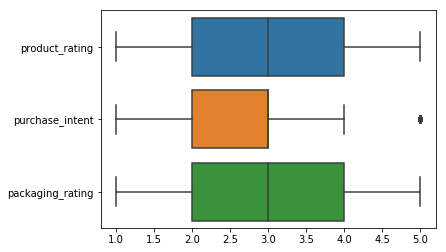

In [16]:
sns.boxplot(data=product_ratings.drop(['product_id','previously_heard_of_product'],axis=1), orient="h");

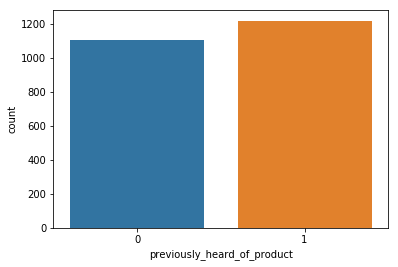

In [18]:
sns.countplot(product_ratings['previously_heard_of_product']);

In [19]:
product_135038 = product_ratings.loc[product_ratings['product_id']==135038] #This pulls out the rows of product 135038

In [84]:
product_135038.drop("product_id",axis=1).describe()

,product_rating,purchase_intent,packaging_rating,previously_heard_of_product
count,48.000000,48.000000,48.000000,48.000000
mean,2.979167,2.583333,2.791667,0.395833
std,1.193771,1.217485,0.988408,0.494204
min,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,0.000000
75%,4.000000,3.000000,3.000000,1.000000
max,5.000000,5.000000,5.000000,1.000000


Out of 2322 products tried, only 48 of them were product 135038, only 2.06% of all ratings were of this snack. However, even this reduced sample size is greater than 30, so I feel safe running statistical analysis on it. But let's visualize exactly how well Product 135038 did.


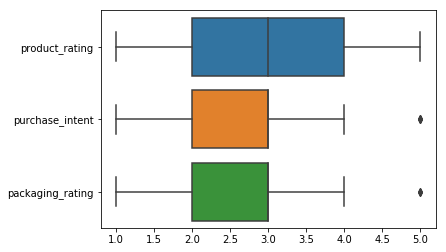

In [39]:
sns.boxplot(data=product_135038.drop(['product_id','previously_heard_of_product'],axis=1), orient="h");

## Ratings for Product 135038

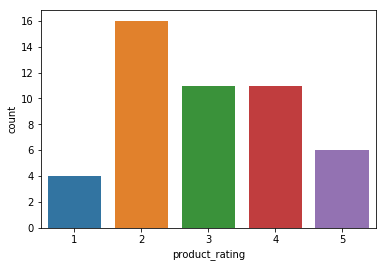

In [22]:
sns.countplot(product_135038.product_rating)

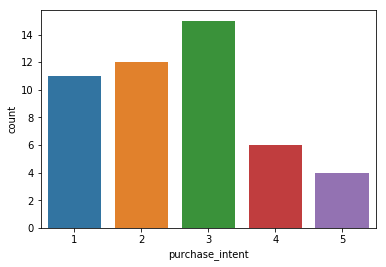

In [23]:
sns.countplot(product_135038.purchase_intent)

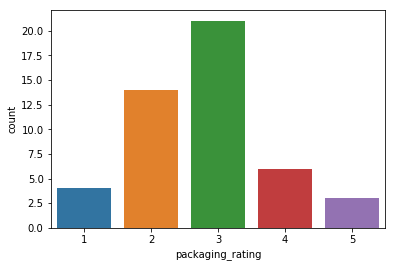

In [24]:
sns.countplot(product_135038.packaging_rating)

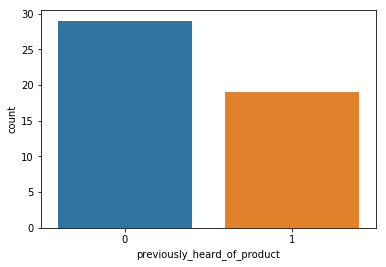

In [25]:
sns.countplot(product_135038.previously_heard_of_product)

When looking at Product 135038 alone, several things stand out. When looking at the boxplots, while product rating seems to have a regular widespread range, the IQR of purchase intent and packaging rating are not evenly spread and are much lower than expected. These two areas need improvement overall. In addition, when looking at customers that have previously heard of the product, there seems to be more that have not heard of the product, than those that have. This gives the marketing team of ABC Snack Co. something specific to be reaching for, a wider audience. The largest majority seem below "average" of 3 so although some people really enjoyed the snack, a majority did not and it may be time to look at formulation. The purchase intent seems like a normal distribution and that seems more directly correlated with product rating. The packaging rating is also something that can be improved as very few people thought it was amazing packaging, but very few hated it entirely.

Also, in addition to just looking at Product 135038's ratings alone, another metric we can use is how well it did in comparison with the average of all the snacks in the data. We can do this both numerically and visually. 

Numerically, this was done two different ways. During the cleaning process I noted that this was ordinal data, most likely on a Likert scale, and textbook statistically speaking it is not correct to use average, and instead median and mad should be used. However, in the real world, rating systems assume normality to a degree, so even places like Amazon will use a (weighted) average but an average nonetheless. I chose to show both median and mean and will show why mean was chosen.

## Statistical Analysis of Ratings of Product 135038

In [26]:
product_135038.drop('product_id',axis=1).median()

product_rating                 3.0
purchase_intent                3.0
packaging_rating               3.0
previously_heard_of_product    0.0
dtype: float64

In [27]:
product_135038.drop('product_id',axis=1).mad() #MAD is median absolute deviation, similar to st dev in averages

product_rating                 0.982639
purchase_intent                1.017361
packaging_rating               0.760417
previously_heard_of_product    0.478299
dtype: float64

In [28]:
product_ratings.drop('product_id',axis=1).median()

product_rating                 3.0
purchase_intent                3.0
packaging_rating               3.0
previously_heard_of_product    1.0
dtype: float64

In [29]:
product_ratings.drop('product_id',axis=1).mad()

product_rating                 0.980897
purchase_intent                1.030531
packaging_rating               1.000474
previously_heard_of_product    0.498837
dtype: float64

It takes just one grouping to realize that using median over mean will make them very hard to differentiate:

Product Rating

|        | Product 135038 | All Products |
|--------|----------------|--------------|
| Median |        3       |       3      |
| MAD    |      0.983     |     0.980    |

Therefore, in addition to many real world examples that use mean in ordinal data, I will use mean to be able to find the most meaningful differences in specific product data. 

We can use the describe function of both the dataframes to easily be able to see the differences in mean and standard deviation in the multiple ratings. 

In [30]:
product_135038.describe()

,product_id,product_rating,purchase_intent,packaging_rating,previously_heard_of_product
count,48.0,48.000000,48.000000,48.000000,48.000000
mean,135038.0,2.979167,2.583333,2.791667,0.395833
std,0.0,1.193771,1.217485,0.988408,0.494204
min,135038.0,1.000000,1.000000,1.000000,0.000000
25%,135038.0,2.000000,2.000000,2.000000,0.000000
50%,135038.0,3.000000,3.000000,3.000000,0.000000
75%,135038.0,4.000000,3.000000,3.000000,1.000000
max,135038.0,5.000000,5.000000,5.000000,1.000000


In [31]:
product_ratings.describe()

,product_id,product_rating,purchase_intent,packaging_rating,previously_heard_of_product
count,2322.000000,2322.000000,2322.00000,2322.000000,2322.000000
mean,134192.041344,3.129199,2.63652,3.108096,0.524117
std,1100.679085,1.179905,1.20983,1.192369,0.499526
min,132560.000000,1.000000,1.00000,1.000000,0.000000
25%,132856.000000,2.000000,2.00000,2.000000,0.000000
50%,135030.000000,3.000000,3.00000,3.000000,1.000000
75%,135059.000000,4.000000,3.00000,4.000000,1.000000
max,135109.000000,5.000000,5.00000,5.000000,1.000000


Product 135038 has a mean product rating of 2.98, and a standard deviation of 1.19, where overall, the snacks have a mean of 3.13, and a std dev of 1.18.  

Product 135038 has a mean purchase intent of 2.58, and a standard deviation of 1.21, where overall, the snacks have a mean of 2.63, and a std dev of 1.21.  

Product 135038 has a mean packaging rating of 2.79, and a standard deviation of 0.99, where overall, the snacks have a mean of 3.11, and a std dev of 1.19.  

Product 135038 has a mean of hearing of the product of ~0.40, and a standard deviation of 0.494, where overall, the snacks have a mean of 0.52, and a std dev of ~0.50.  

Hearing about the product as a binary is a little difficult to test mean, standard deviation and statistical test for, so it will be visually represented down further below.


<br><br> 


Statistical significance tests can be used to determine whether or not the difference between the means is statistically significant. 

The null hypothesis for the tests conducted below is: Product 135038 has the same average rating as all snacks.
 

In [35]:
#I will start with testing the difference of means in product rating 
from scipy.stats import ttest_ind
t_val, p_val = ttest_ind(product_135038['product_rating'], product_ratings['product_rating'])
print('t-statistic: ',t_val)
print('p value: ',p_val)

alpha = 0.1 #90% confidence
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

t-statistic:  -0.8717930304849656
p value:  0.38340967697592765
The null hypothesis cannot be rejected


In [36]:
#Now to test on other ratings
#Once again, the null hypothesis is that they have the same mean 
t_val, p_val = ttest_ind(product_135038['purchase_intent'], product_ratings['purchase_intent'])
print('t-statistic of purchase intent: ',t_val)
print('p value of purchase intent: ',p_val)
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
t_val, p_val = ttest_ind(product_135038['packaging_rating'], product_ratings['packaging_rating'])
print('t-statistic of packaging rating: ',t_val)
print('p value of packaging rating: ',p_val)
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
t_val, p_val = ttest_ind(product_135038['previously_heard_of_product'], product_ratings['previously_heard_of_product'])
print('t-statistic for heard of product: ',t_val)
print('p value for heard of product: ',p_val)
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

t-statistic of purchase intent:  -0.3014415603229732
p value of purchase intent:  0.7631042744119759
The null hypothesis cannot be rejected
t-statistic of packaging rating:  -1.825562904813901
p value of packaging rating:  0.06804201839090206
The null hypothesis can be rejected
t-statistic for heard of product:  -1.7615014433525609
p value for heard of product:  0.078282600028067
The null hypothesis can be rejected


However when the alpha is changed so that a 95% confidence interval is constructed, the null hypothesis cannot be rejected in any of its ratings. This is both a good thing and a bad thing for ABC Snack Co. They are average, though a little below, and only when the confidence is lowered is it statistically significantly lower. This is not where a company wants to be, but it could be worse. 

Above I noted that for the previously heard of product it was hard to compare numerically/statistically, so it is easier to compare side by side visually the difference between the specific product and snacks overall. 


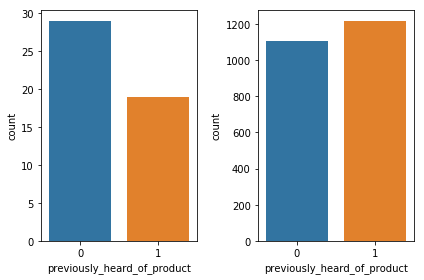

In [37]:
fig, ax =plt.subplots(1,2)
sns.countplot(product_135038.previously_heard_of_product,ax=ax[0])
sns.countplot(product_ratings.previously_heard_of_product,ax=ax[1])
plt.tight_layout()

On the left is specifically product 135038 and on the right is snacks in general. As stated above, this is important task for the marketing team of ABC Snack Co. to address. 

# Analysis for all ABC Snack Co Snacks

In order to do analysis on ABC Snack Co's Snacks, all snack products of ABC Snack Co need to be found. This was done by searching the products table for the snack company name and finding all corresponding product IDs. Then a new dataframe was generated using only the data that matched the product ID of ABC Snack Co's products. 

In [40]:
abc_products=products[products['brand_name'].str.contains('ABC Snacks Co.')]['product_id'].tolist()

In [41]:
abc_ratings= pd.DataFrame()
for each in range(len(product_ratings.index)):
    if product_ratings.iloc[each,1] in abc_products:
        abc_ratings = abc_ratings.append(product_ratings.iloc[each,:]) #building dataframe using matched IDs 

## Statistical Analysis

In [43]:
abc_ratings.drop('product_id',axis=1).describe()

,packaging_rating,previously_heard_of_product,product_rating,purchase_intent
count,132.000000,132.000000,132.000000,132.000000
mean,3.053030,0.477273,3.083333,2.643939
std,1.206309,0.501386,1.152771,1.186003
min,1.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,2.000000,2.000000
50%,3.000000,0.000000,3.000000,3.000000
75%,4.000000,1.000000,4.000000,3.000000
max,5.000000,1.000000,5.000000,5.000000


We can again do statistical testing and visualization to see how well ABC Snack Co's snacks do against the average of all snacks.

In [44]:
t_val, p_val = ttest_ind(abc_ratings['product_rating'], product_ratings['product_rating'])
print('t-statistic: ',t_val)
print('p value: ',p_val)

alpha = 0.1 #90% confidence
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

t-statistic:  -0.4349599023895729
p value:  0.6636298110269105
The null hypothesis cannot be rejected


In [45]:
t_val, p_val = ttest_ind(abc_ratings['purchase_intent'], product_ratings['purchase_intent'])
print('t-statistic of purchase intent: ',t_val)
print('p value of purchase intent: ',p_val)
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
t_val, p_val = ttest_ind(abc_ratings['packaging_rating'], product_ratings['packaging_rating'])
print('t-statistic of packaging rating: ',t_val)
print('p value of packaging rating: ',p_val)
if p_val < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

t-statistic of purchase intent:  0.0686062333797544
p value of purchase intent:  0.9453086509864856
The null hypothesis cannot be rejected
t-statistic of packaging rating:  -0.5158010892368053
p value of packaging rating:  0.6060398460123455
The null hypothesis cannot be rejected


The p-values are ridiculously high, which means pretty much under no circumstances will we be rejecting the null hypothesis. This means there is no difference of means between the overall snacks average and ABC Snack Co's. We can try to take a deeper look by looking at the distribution in the count plots between the two to try to determine if there is a visual difference, but there is no statistical difference.

The easiest one to see is the difference in previously heard of product, since it is binary. 

## Visual Analysis

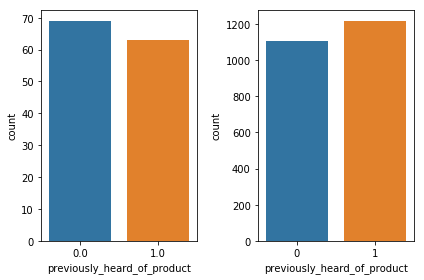

In [46]:
fig, ax =plt.subplots(1,2)
sns.countplot(abc_ratings.previously_heard_of_product,ax=ax[0])
sns.countplot(product_ratings.previously_heard_of_product,ax=ax[1])
plt.tight_layout()

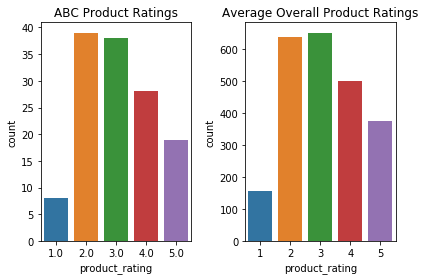

In [52]:
fig, ax =plt.subplots(1,2)
sns.countplot(abc_ratings.product_rating,ax=ax[0])
ax[0].set_title("ABC Product Ratings")
sns.countplot(product_ratings.product_rating,ax=ax[1])
ax[1].set_title("Average Overall Product Ratings")
plt.tight_layout()

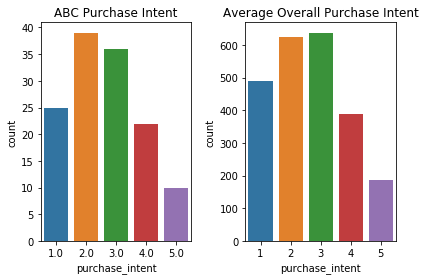

In [53]:
fig, ax =plt.subplots(1,2)
sns.countplot(abc_ratings.purchase_intent,ax=ax[0])
ax[0].set_title("ABC Purchase Intent")
sns.countplot(product_ratings.purchase_intent,ax=ax[1])
ax[1].set_title("Average Overall Purchase Intent")
plt.tight_layout()

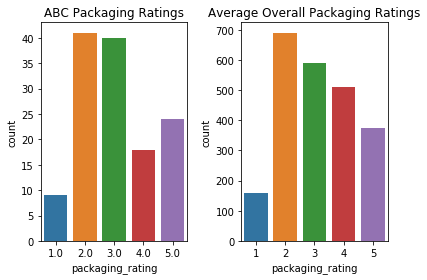

In [54]:
fig, ax =plt.subplots(1,2)
sns.countplot(abc_ratings.packaging_rating,ax=ax[0])
ax[0].set_title("ABC Packaging Ratings")
sns.countplot(product_ratings.packaging_rating,ax=ax[1])
ax[1].set_title("Average Overall Packaging Ratings")
plt.tight_layout()

So based on the visual analysis, it becomes clear that as a whole, ABC Snack Co. should focus more on boosting up the product rating and purchase intent numbers, though distribution makes it look completely average. When looking at the company as a whole, their packaging rating is seemingly above average though this wasn't the case when we looked at only product 135038. This leads me to believe product 135038 is not performing as well as it should be.

# ABC Customer Profile**

**A large assumption that I made here was that when the prompt asked for "our review population", that I moved forward with only the customers that rated ABC Snack Co's products and not the entire reviewer population. 

Let's try to figure out what the average customer of ABC Snack Co. looks like. In order to do this we need to find of the entire customer population, which ones have tried and responded with ratings of ABC Snack's portfolio of snacks. This can be done easily by pulling the unique customer ID's out of the ratings dataframe which had all ratings for ABC Snack Co's products. 

In [56]:
abc_customers=abc_ratings['customer_id'].unique().tolist()#finding what customers have tried ABC Snack Co's products
abc_customers[0:5]

['U1001', 'U1003', 'U1005', 'U1007', 'U1009']

In [58]:
abc_profile= pd.DataFrame()
for each in range(len(df.index)): #df was our updated customer profiles dataframe after filling in missing data
    if df.iloc[each,0] in abc_customers:
        abc_profile = abc_profile.append(df.iloc[each,:])

In [59]:
abc_profile.head()

,birth_year,customer_id,education,employment,gender,kids,marital_status,months_membership,product_sharing,weekly_snack_budget
0,1989.0,U1001,bachelor's degree,professional,male,independent,single,12.0,family,medium
2,1989.0,U1003,bachelor's degree,professional,male,independent,married,6.0,family,low
4,1992.0,U1005,some higher education,student,female,independent,single,13.0,family,medium
6,1989.0,U1007,bachelor's degree,professional,male,independent,single,16.0,solitary,low
8,1991.0,U1009,high school diploma,professional,female,kids,single,14.0,family,medium


In [60]:
abc_profile.describe()

,birth_year,months_membership
count,100.000000,100.000000
mean,1989.440000,6.500000
std,6.689839,4.791617
min,1960.000000,1.000000
25%,1989.000000,3.000000
50%,1991.000000,5.000000
75%,1992.250000,9.250000
max,1997.000000,18.000000


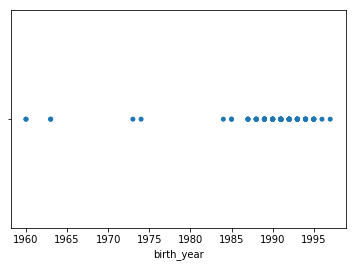

In [61]:
sns.stripplot(abc_profile.birth_year)

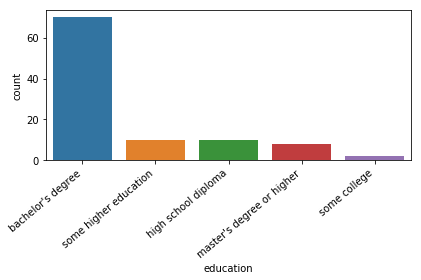

In [63]:
ax= sns.countplot(x="education",data=abc_profile);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

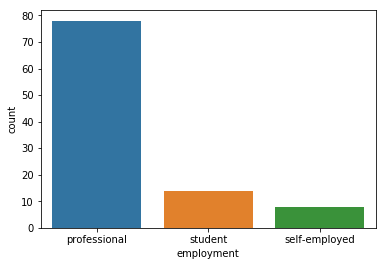

In [64]:
sns.countplot(x="employment",data=abc_profile);

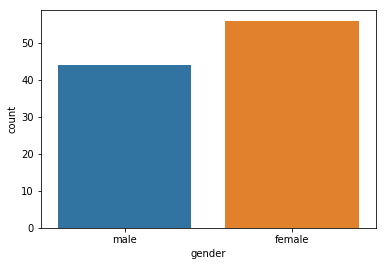

In [65]:
sns.countplot(x="gender",data=abc_profile)

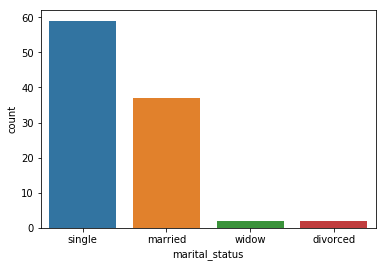

In [66]:
sns.countplot(x="marital_status",data=abc_profile)

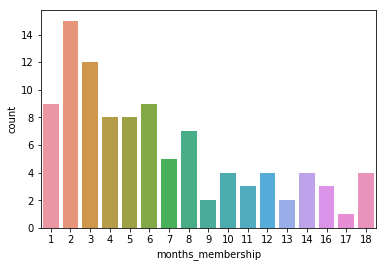

In [67]:
abc_profile.months_membership = abc_profile.months_membership.astype(int)
sns.countplot(x="months_membership",data=abc_profile)

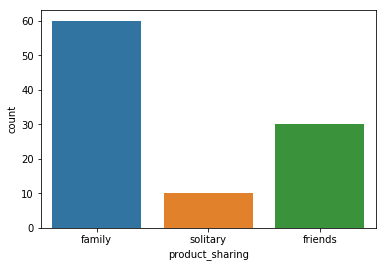

In [68]:
sns.countplot(x="product_sharing",data=abc_profile)

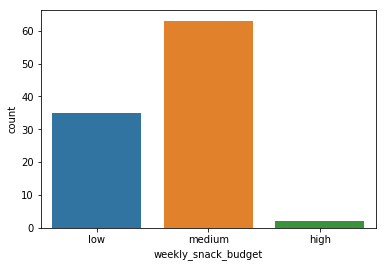

In [76]:
sns.countplot(x="weekly_snack_budget",data=abc_profile,order=["low","medium","high"])

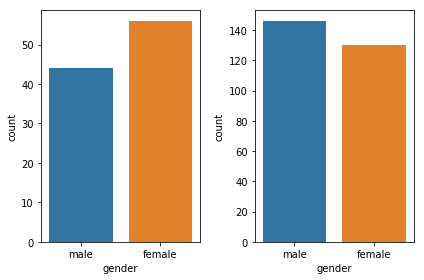

In [70]:
fig, ax =plt.subplots(1,2)
sns.countplot(abc_profile.gender,ax=ax[0])
sns.countplot(df.gender,ax=ax[1])
plt.tight_layout()
#higher female to male ratio on ABC products than the average.

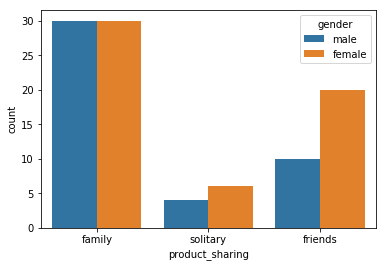

In [71]:
sns.countplot(x="product_sharing", hue="gender", data=abc_profile)

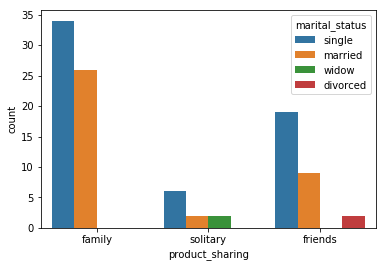

In [72]:
sns.countplot(x="product_sharing", hue="marital_status", data=abc_profile)

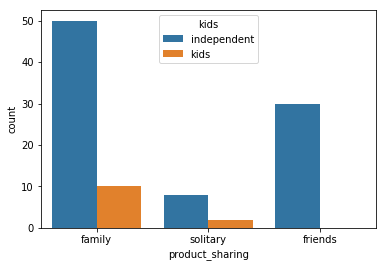

In [82]:
sns.countplot(x="product_sharing", hue="kids", data=abc_profile)

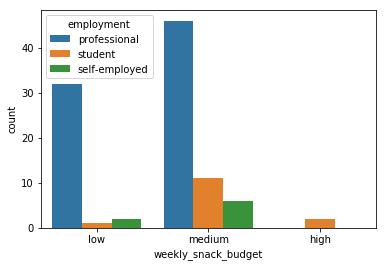

In [75]:
sns.countplot(x="weekly_snack_budget",hue="employment",data=abc_profile,order=["low","medium","high"])

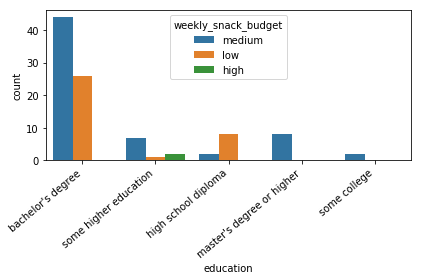

In [80]:
ax=sns.countplot(x="education",hue="weekly_snack_budget",data=abc_profile);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [81]:
abc_profile[abc_profile['weekly_snack_budget']=="high"] #Who are the only two people with the high snack budget?

,birth_year,customer_id,education,employment,gender,kids,marital_status,months_membership,product_sharing,weekly_snack_budget
98,1989.0,U1099,some higher education,student,male,independent,single,3,family,high
236,1994.0,U1237,some higher education,student,male,independent,married,9,family,high


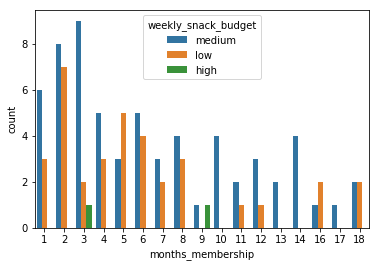

In [83]:
sns.countplot(hue="weekly_snack_budget", x="months_membership", data=abc_profile)

So what conclusions can we draw from the customer profile of ABC products? Most customers are in their 20-30s, with bachelor's degrees. With the assumption that some college and some high education categories come after high school, it seems that all ABC Snack Co's customers have at least a high school level education. Most are professionals with some who are still students. More of ABC Snack Co's customers are female than male, despite the average snacks having more men than women. This  may be a strategy to look into targeting going forward. Most are single or married, rather than divorced or widowed. The majority of ABC Snack Co's customers have memberships < 6 months. Most share with family or friends over not sharing at all, and most have a low to medium snack budget. COmparisons within the categories has also generated new insights towards customer habits. Females seem much more likely to share with friends than males though they share with family equally. Widows and divorcees of ABC Snack Co's customers do not share with family, but for a reason not easily obtainable with this data, single people share more with their family than married customers. Those with kids do not share with friends at all, choosing to share only with family or hide the snacks for themselves. The only people with high snack budgets are students. The number of them is quite low, so although it is easiest to use them as a target audience since they have the highest budget, it will end up backfiring since most of the customers do not follow their budgeting technique. Those with higher education tend to have more medium sized snack budgets than low, though students tend to have larger budgets than professionals. Data is also missing that would be very important in figuring out pricing of product, in which targeting a certain customer profile would mean changing the pricing. The best thing for ABC Snack Co. to do is target those with medium size snack budgets who may be early career professionals who are single or married. 

# Business Recommendations to ABC Snack Co.

The CPG industry knows that average is not good enough in a competitive industry where if a product does not make it, it will be forgotten, and those that do make it must fight amongst similar products that pop up immediately. Product 135038 is doing well enough that with corrections in both the production and the marketing side, it has the potential to be a great product. It is hard to make the determination about whether these changes will pay off in the long run due to not having financial data nor changes over time, therefore these recommendations will be based on the single snapshot moment of the data provided.
<br><br>
The product rating that customers provided has a wide spread, which is good in that a part of the customer base already thoroughly enjoys the product. However, with 3 being an "average" snack, a lot of customers find themselves in the slightly below average group. With a more robust survey system, it would be possible to find out exactly what these customers do not like about the product, and it would be a good business decision to take those changes into account so that the product rating can at least become more normally distributed at an average of 3 or above rather than the average in our sample which is slightly below 3. This could be done by changing the ingredients, taste profile, amount of product in each package, or other features that customers would want to see in product 135038.
<br> <br>
Purchase intent seems skewed towards the lower end, but is not too different as far as the average snack is. This is no fault of ABC Snack Co's and I believe that this metric is directly influenced by the product rating. Therefore, there are no specific recommendations toward purchase intent. If the product rating goes up, the purchase intent should as well.
<br><br>
Packaging rating is the one of the easier metrics, and is also one that happens to be below average. The way this is fixed is by changing packaging to better fit the intended customer. By looking at the most common customer when analyzing customer profiles above, the packaging can be for instance, altered to appeal to more females since more females seem to be drawn toward ABC Snack Co's offerings. Additional testing should be done in this case, such as A/B testing, to see which packaging a customer prefers more. Using these two measures would generate a higher packaging rating, which may also increase purchase intent.
<br><br>
So of all snacks under all brands, more customers have heard of the products over not having heard of them. This is not the case in ABC Snack Co's portfolio, and therefore leaves a significant area for improvement. ABC Snack Co. should work on building a marketing campaign that targets their most likely customer but for those who have not heard of the brand or product before. The data is missing to say whether a customer has heard of the brand but not the product, as this would be an easy audience to target since they are already familiar with the brand. Although expensive, it is beneficial to get the audience to hear about a product they have not heard of before, since it makes them more likely to try it over a product they have not heard of. 
<br> <br>
It is possible that implementing these would be time and cost prohibitive and more data is needed to see if product 135038 is a large enough part of ABC Snack Co's portfolio to implement these changes. If product 135038 is one of the largest sellers of ABC Snack Co. the above recommendations should be taken into consideration to increase revenue of the product. 

# Addendum

I would have liked the opportunity to explore more in depth the relationships between the data regarding the months of membership and certain ratings. I also would have liked to dig deeper with the product ratings vs other specific companies rather than all products as a whole. I chose not to work too much with customer preference but believe that there may be some correlation with their preferences before trying any product, and the products that customers rate highly after trying. I would also want to test to see if certain products are preferred based on customer profiling rather than preference as well. For the sake of time, I chose to stick to metrics I believe were most directly correlated, but I believe that cross referencing the products with customer profile would generate a better understanding of the customer, instead of just gathering an idea of what the existing customer base already looked like. I also would have liked to conduct a multiple correspondence analysis(a PCA for categorical variables) but I am not quite sure how to do so in python. It would be to find the elements of a customer profile that would most likely contribute to a higher (4 or 5) rating. Given more time and data, I would have loved to test if there is a chance of customers changing over time, from low budgets in early months of membership to medium sized ones with longer memberships. In addition, I would have like to test the hypothesis that a higher months membership meant a higher purchase intent.